In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv(r'/content/Dataset .csv')

In [ ]:
df = df.dropna(subset=['Aggregate rating'])

In [ ]:
features = ['Cuisines', 'Price range', 'Aggregate rating', 'Votes', 'Currency', 'Has Online delivery']

In [ ]:
df = df[features]

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=features)

In [ ]:
categorical_cols = ['Cuisines', 'Currency', 'Has Online delivery']
numerical_cols = ['Price range', 'Aggregate rating', 'Votes']

encoder = OneHotEncoder(handle_unknown='ignore')
encoded_cat = encoder.fit_transform(df_imputed[categorical_cols]).toarray()
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(categorical_cols))

In [ ]:
df_final = pd.concat([df_imputed[numerical_cols].astype(float).reset_index(drop=True), encoded_cat_df], axis=1)
df_imputed['restaurant_id'] = df_imputed.index  # Simulate restaurant ID


In [ ]:
user_pref = {
    'Cuisines': 'Italian',
    'Currency': 'Indian Rupees(Rs.)',
    'Has Online delivery': 'Yes',
    'Price range': 2,
    'Aggregate rating': 4.0,
    'Votes': 200
}

In [ ]:
user_df = pd.DataFrame([user_pref])

# Impute and encode user input
user_encoded_cat = encoder.transform(user_df[categorical_cols]).toarray()
user_cat_df = pd.DataFrame(user_encoded_cat, columns=encoder.get_feature_names_out(categorical_cols))

# Combine user numerical and encoded categorical features
user_vector = pd.concat([
    user_df[numerical_cols].astype(float).reset_index(drop=True),
    user_cat_df
], axis=1)

# Ensure same columns
user_vector = user_vector.reindex(columns=df_final.columns, fill_value=0)

In [ ]:
similarities = cosine_similarity(user_vector, df_final)
top_indices = similarities[0].argsort()[::-1][:10]
recommendations = df_imputed.iloc[top_indices]

In [ ]:
print("Top Restaurant Recommendations Based on Your Preferences:\n")
print(recommendations[['Cuisines', 'Price range', 'Aggregate rating', 'Votes', 'Currency', 'Has Online delivery']])

Top Restaurant Recommendations Based on Your Preferences:

                                Cuisines Price range Aggregate rating Votes  \
3219                             Italian           3              3.9   245   
6705  North Indian, Chinese, Continental           2              4.4   229   
1402     Juices, Beverages, Healthy Food           2              4.3   217   
3262     Cafe, Healthy Food, Continental           2              4.1   223   
3014                        North Indian           3              4.7   242   
1254                    Pizza, Fast Food           2              4.0   219   
1250              Cafe, Bakery, Desserts           2              4.0   199   
1440         Bakery, Desserts, Beverages           2              4.1   227   
1381     Mexican, American, Healthy Food           2              4.9   223   
803                    Burger, Fast Food           2              4.5   249   

                Currency Has Online delivery  
3219  Indian Rupees(Rs.)

<ipython-input-21-17544cad1d25>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


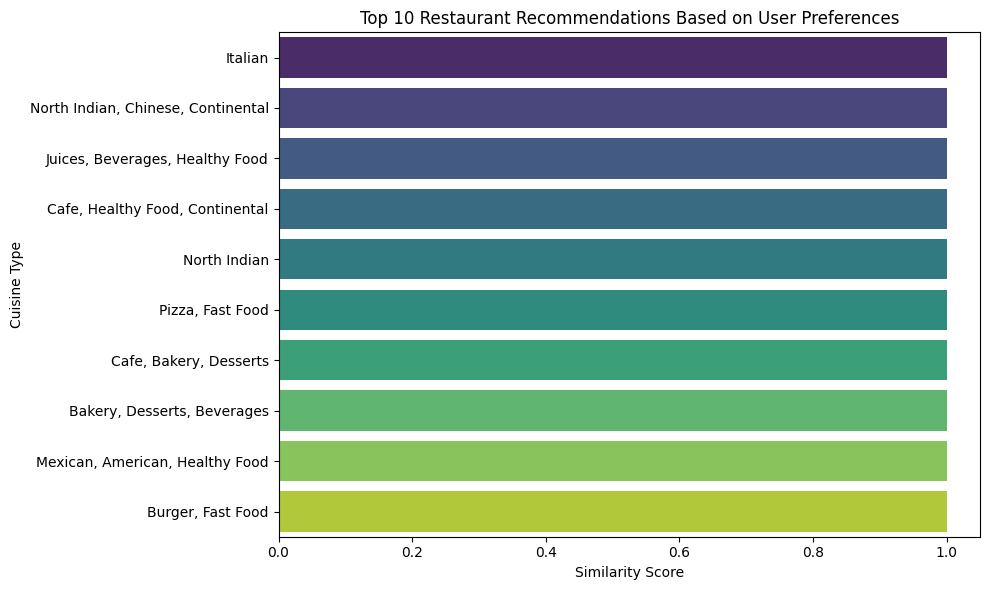

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add similarity scores to the recommendations
recommendations = recommendations.copy()
recommendations['similarity_score'] = similarities[0][top_indices]

# Plot top 10 similarity scores
plt.figure(figsize=(10, 6))
sns.barplot(
    x='similarity_score',
    y='Cuisines',
    data=recommendations.sort_values(by='similarity_score', ascending=False),
    palette='viridis'
)
plt.xlabel('Similarity Score')
plt.ylabel('Cuisine Type')
plt.title('Top 10 Restaurant Recommendations Based on User Preferences')
plt.tight_layout()
plt.show()
